In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving tweetsappel.csv to tweetsappel.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded1['tweetsappel.csv']), sep=',', on_bad_lines='skip')

In [ ]:
data

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['pol']= data['Reviews'].apply(pol)
data['sub']= data['Reviews'].apply(sub)
data

,Ratings,Comment,Reviews,pol,sub
0,5,Super!,Great camera for pics and videos Battery life ...,0.390909,0.595455
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,0.690909,0.659091
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",0.433333,0.426667
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,0.272222,0.590556
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,0.265000,0.530000
...,...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,0.350000,0.700000
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",0.625000,0.666667
9710,5,Awesome,very niceREAD MORE,0.350000,0.400000
9711,5,Super!,Loving it as of now. Good Product .READ MORE,0.600000,0.683333


In [ ]:
import re
import string
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




import pydot

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text):
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))])

    return text2.lower()

In [ ]:
data['Reviews'] = data['Reviews'].apply(remove_emoji)
data['Reviews'] = data['Reviews'].apply(remove_url)
data['Reviews'] = data['Reviews'].apply(clean_text)

In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text= remove_stopwords(text)
    return text

In [ ]:
cleanreviews=[]
for i in data['Reviews']:
  cleansentence=clean(i)
  cleanreviews.append(cleansentence)

In [ ]:
data=data.assign(sw_reviews=cleanreviews)

In [ ]:
#Etape 3 normalisation:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatize_sentence(tokens):
 lemmatizer = WordNetLemmatizer()
 lemmatized_sentence = []
 for word , tag in pos_tag(tokens):
  if tag.startswith('NN'):
      pos = 'n'
  elif tag.startswith('VB'):
      pos ='v'
  else:
     pos ='a'
  lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
  return lemmatized_sentence

In [ ]:
lemreviews=[]
for i in data['sw_reviews']:
  lemmatize_sentence=clean(i)
  lemreviews.append(lemmatize_sentence)

In [ ]:
data=data.assign(sw_lem_reviews=lemreviews)

In [ ]:
pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tokens_without_sw =[]
for i in data['sw_lem_reviews']:
  text_tokens = word_tokenize(i)
  tokens_without_sw.append(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['tokens_lem_without_sw']=tokens_without_sw
data

,Ratings,Comment,Reviews,pol,sub,sw_reviews,sw_lem_reviews,tokens_lem_without_sw
0,5,Super!,great camera for pics and videos battery life ...,0.390909,0.595455,great camera pics videos battery life good far...,great camera pics videos battery life good far...,"[great, camera, pics, videos, battery, life, g..."
1,5,Must buy!,great device let tell the pros1 superb build q...,0.690909,0.659091,great device let tell superb build quality gre...,great device let tell superb build quality gre...,"[great, device, let, tell, superb, build, qual..."
2,5,Great product,who all loves older size inch type should defi...,0.433333,0.426667,loves older size inch type definitely better b...,loves older size inch type definitely better b...,"[loves, older, size, inch, type, definitely, b..."
3,5,Simply awesome,this iphone the best phone ever you get beauti...,0.272222,0.590556,iphone best phone beautifully designed gives c...,iphone best phone beautifully designed gives c...,"[iphone, best, phone, beautifully, designed, g..."
4,5,Classy product,this second iphone after iphone i’ve been long...,0.265000,0.530000,second iphone iphone ive long time android use...,second iphone iphone ive long time android use...,"[second, iphone, iphone, ive, long, time, andr..."
...,...,...,...,...,...,...,...,...
9708,5,Terrific purchase,absolutely brilliantread more,0.350000,0.700000,absolutely brilliantread,absolutely brilliantread,"[absolutely, brilliantread]"
9709,5,Classy product,superb phone this 4th iphone feel 2020is the t...,0.625000,0.666667,superb phone iphone feel thinnest pocket frien...,superb phone iphone feel thinnest pocket frien...,"[superb, phone, iphone, feel, thinnest, pocket..."
9710,5,Awesome,very niceread more,0.350000,0.400000,niceread,niceread,[niceread]
9711,5,Super!,loving now good product read more,0.600000,0.683333,loving good product read,loving good product read,"[loving, good, product, read]"


In [ ]:
def label(polarity):
  if polarity >0:
    return 'Positive'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [ ]:
labell = lambda x: label(x)
data['Label']=data['pol'].apply(labell)

In [ ]:
data

,Ratings,Comment,Reviews,pol,sub,sw_reviews,sw_lem_reviews,tokens_lem_without_sw,Label
0,5,Super!,great camera for pics and videos battery life ...,0.390909,0.595455,great camera pics videos battery life good far...,great camera pics videos battery life good far...,"[great, camera, pics, videos, battery, life, g...",Positive
1,5,Must buy!,great device let tell the pros1 superb build q...,0.690909,0.659091,great device let tell superb build quality gre...,great device let tell superb build quality gre...,"[great, device, let, tell, superb, build, qual...",Positive
2,5,Great product,who all loves older size inch type should defi...,0.433333,0.426667,loves older size inch type definitely better b...,loves older size inch type definitely better b...,"[loves, older, size, inch, type, definitely, b...",Positive
3,5,Simply awesome,this iphone the best phone ever you get beauti...,0.272222,0.590556,iphone best phone beautifully designed gives c...,iphone best phone beautifully designed gives c...,"[iphone, best, phone, beautifully, designed, g...",Positive
4,5,Classy product,this second iphone after iphone i’ve been long...,0.265000,0.530000,second iphone iphone ive long time android use...,second iphone iphone ive long time android use...,"[second, iphone, iphone, ive, long, time, andr...",Positive
...,...,...,...,...,...,...,...,...,...
9708,5,Terrific purchase,absolutely brilliantread more,0.350000,0.700000,absolutely brilliantread,absolutely brilliantread,"[absolutely, brilliantread]",Positive
9709,5,Classy product,superb phone this 4th iphone feel 2020is the t...,0.625000,0.666667,superb phone iphone feel thinnest pocket frien...,superb phone iphone feel thinnest pocket frien...,"[superb, phone, iphone, feel, thinnest, pocket...",Positive
9710,5,Awesome,very niceread more,0.350000,0.400000,niceread,niceread,[niceread],Positive
9711,5,Super!,loving now good product read more,0.600000,0.683333,loving good product read,loving good product read,"[loving, good, product, read]",Positive


In [ ]:
#data.head()

In [ ]:
#y= data.Label
#y

In [ ]:
#x=data.Reviews
#x

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=481a630a5bb776cba6f2c4b36f8eab5269d2a74a01c01672235fd21f880e196f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data)

In [ ]:
#train

In [ ]:
#test

In [ ]:
train['num_word_Reviews'] = train['sw_lem_reviews'].apply(lambda x:len(str(x).split()))

In [ ]:
test['num_word_Reviews'] = test['sw_lem_reviews'].apply(lambda x:len(str(x).split()))

In [ ]:
max_train_sentence_length  = train['num_word_Reviews'].max()
max_test_sentence_length  = test['num_word_Reviews'].max()

In [ ]:
print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

Train Max Sentence Length :53
Test Max Sentence Length :49


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train['sw_lem_reviews'].tolist(),\
                                                      train['Label'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train['Label'].tolist(),\
                                                      random_state=0)

In [ ]:
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:6555
Class distributionCounter({'Positive': 6368, 'Negative': 177, 'Neutral': 10})
Valid data len:729
Class distributionCounter({'Positive': 708, 'Negative': 20, 'Neutral': 1})


In [ ]:
num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train['sw_lem_reviews'].tolist())

In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test['sw_lem_reviews'].tolist()) )

<ipython-input-32-2fbf15aadc62>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
<ipython-input-32-2fbf15aadc62>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
<ipython-input-32-2fbf15aadc62>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

In [ ]:
x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

In [ ]:
print(x_train[0])

[ 4 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
le = LabelEncoder()

In [ ]:
train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

In [ ]:
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

In [ ]:
test_labels = le.transform(test['Label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)

['Negative', 'Neutral', 'Positive']

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive']
Text to number
[2 2 2 2 2 2 2 2 2 2]
Number to category
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==3:
        break

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[ 4  9 19 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[ 47 107  26   2  36  47  18   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[13 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[141  20   5  63   4   5  14   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(


In [ ]:
max_features =20000
embedding_dim =64
sequence_length = 40


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))

In [ ]:
model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))


In [ ]:
model.add(tf.keras.layers.GlobalMaxPooling1D())

In [ ]:
model.add(tf.keras.layers.Dropout(0.5))


In [ ]:
model.add(tf.keras.layers.Dense(3, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))

In [ ]:
model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,305,155
Trainable params: 1,305,155
Non-trainable params: 0
______________________________________________

In [ ]:
pip install CategoricalAccuracy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement CategoricalAccuracy (from versions: none)
ERROR: No matching distribution found for CategoricalAccuracy


In [ ]:
epochs = 100
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 4s 44ms/step - loss: 0.6886 - categorical_accuracy: 0.9291 - val_loss: 0.2299 - val_categorical_accuracy: 0.9726
Epoch 2/100
52/52 [==============================] - 3s 55ms/step - loss: 0.1980 - categorical_accuracy: 0.9721 - val_loss: 0.1835 - val_categorical_accuracy: 0.9726
Epoch 3/100
52/52 [==============================] - 2s 46ms/step - loss: 0.1718 - categorical_accuracy: 0.9721 - val_loss: 0.1589 - val_categorical_accuracy: 0.9726
Epoch 4/100
52/52 [==============================] - 2s 40ms/step - loss: 0.1369 - categorical_accuracy: 0.9719 - val_loss: 0.1444 - val_categorical_accuracy: 0.9616
Epoch 5/100
52/52 [==============================] - 2s 37ms/step - loss: 0.1203 - categorical_accuracy: 0.9721 - val_loss: 0.1253 - val_categorical_accuracy: 0.9712
Epoch 6/100
52/52 [==============================] - 2s 38ms/step - loss: 0.1099 - categorical_accuracy: 0.9765 - val_loss: 0.1198 - val_categorical_accuracy: 0.9712
Epoch 7/100
52/5

In [ ]:
history.history


{'loss': [0.6886471509933472,
  0.1979764848947525,
  0.17177575826644897,
  0.13690635561943054,
  0.12032323330640793,
  0.10993246734142303,
  0.09949586540460587,
  0.09470869600772858,
  0.09168800711631775,
  0.08716405928134918,
  0.08133749663829803,
  0.07852138578891754,
  0.07838670909404755,
  0.07644563168287277,
  0.07285524159669876,
  0.07067543268203735,
  0.07239441573619843,
  0.07069579511880875,
  0.06862853467464447,
  0.06834826618432999,
  0.07072516530752182,
  0.07047330588102341,
  0.07053905725479126,
  0.0683373287320137,
  0.0687422901391983,
  0.06662914156913757,
  0.06645813584327698,
  0.0666840597987175,
  0.06567023694515228,
  0.06710516661405563,
  0.06488633155822754,
  0.06545569002628326,
  0.0653989315032959,
  0.06391819566488266,
  0.06451737880706787,
  0.06567133218050003,
  0.06499870121479034,
  0.062469352036714554,
  0.06626167893409729,
  0.06378629803657532,
  0.06282366067171097,
  0.06228397414088249,
  0.06382691860198975,
  0.0650

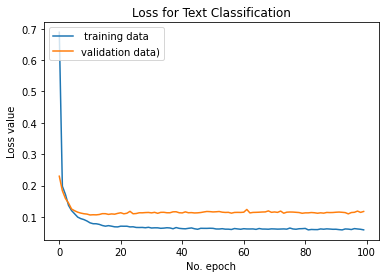

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
tf.keras.metrics.CategoricalAccuracy(
    name='categorical_accuracy', dtype=None
)

KeyError: ignored

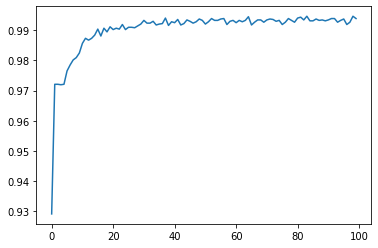

In [ ]:
plt.plot(history.history["categorical_accuracy"], label=' (training data)')
plt.plot(history.history['val_CategoricalAccuracy'], label='CategoricalCrossentropy (validation data)')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('C:\\TweetSenitment\\savedTFCNNModel\\tf_cnnmodel')
json_string = tokenizer.to_json()

In [ ]:
import json
with open('C:\\TweetSenitment\\savedTFCNNModel\\tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,305,155
Trainable params: 1,305,155
Non-trainable params: 0
______________________________________________

In [ ]:
with open('C:\\TweetSenitment\\savedTFCNNModel\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [ ]:
x_test  = np.array( tokenizer1.texts_to_sequences(test['sw_lem_reviews'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=40)

<ipython-input-79-c6cbe30b6bd8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test  = np.array( tokenizer1.texts_to_sequences(test['sw_lem_reviews'].tolist()) )


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
76/76 [==============================] - 0s 4ms/step
[[0.11296215 0.08286686 0.9870098 ]
 [0.29805514 0.10971039 0.9438414 ]
 [0.16195928 0.09988208 0.9761327 ]
 ...
 [0.16195928 0.09988208 0.9761327 ]
 [0.37170446 0.07099007 0.9508861 ]
 [0.0664792  0.06321485 0.99451303]]


In [ ]:
test['pred_sentiment']= predict_results
test['pred_sentiment'] = np.where((test.pred_sentiment == 0),'Negative',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '1'),'Neutral',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '2'),'Positive',test.pred_sentiment)

In [ ]:
test['pred_sentiment']

7126    Positive
1976    Positive
3462    Positive
1762    Negative
5928    Positive
          ...   
6686    Positive
8568    Positive
2296    Positive
933     Positive
1784    Positive
Name: pred_sentiment, Length: 2429, dtype: object

In [ ]:
test['Label']

7126    Positive
1976    Positive
3462    Positive
1762    Negative
5928    Positive
          ...   
6686    Positive
8568    Positive
2296    Positive
933     Positive
1784    Positive
Name: Label, Length: 2429, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy = accuracy_score(test['Label'], test['pred_sentiment'])

In [ ]:
print('Accuracy: %f' % accuracy)

Accuracy: 0.982709


In [ ]:
labels = ['positive', 'negative','neutral']

print(classification_report(test['Label'].tolist(),test['pred_sentiment'].tolist()))

              precision    recall  f1-score   support

    Negative       0.80      0.51      0.62        63
     Neutral       0.00      0.00      0.00         3
    Positive       0.99      1.00      0.99      2363

    accuracy                           0.98      2429
   macro avg       0.60      0.50      0.54      2429
weighted avg       0.98      0.98      0.98      2429



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
